In [1]:
import re, string, unicodedata

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
STOPWORDS = stopwords.words('portuguese')
csv = '../data/jairbolsonaro_200_days_tweets.csv'

blind = {
    "<url>": "url",
}

In [3]:
df = pd.read_csv(csv)

In [4]:
df.head()

,id,created_at,text
0,1152311900887085056,2019-07-19 20:19:00,- Live da Semana (18/07/2019) completa já disp...
1,1152267351020179456,2019-07-19 17:21:59,RT @VicenteSantini: A ideia do #FutureSe é dar...
2,1152208690910564352,2019-07-19 13:28:53,- Em minha primeira participação na Cúpula do ...
3,1152180699509743616,2019-07-19 11:37:39,https://t.co/f5FStg5ryc
4,1152046487599271937,2019-07-19 02:44:21,- O período em que nasci de novo. Agradeço a D...


In [5]:
def re_sub(text, pattern, repl):
    return re.sub(pattern, repl, text)


def remove_non_ascii(text):
    new_tokens = []
    tokens = text.split()
    
    for token in tokens:
        token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_tokens.append(token)
    
    return ' '.join(new_tokens)


def remove_punctuation(text):
    tokens = [c for c in text if c not in string.punctuation]
                
    return ''.join(tokens)


def strip_text(text):
    return text.strip()


def remove_stopwords(text):
    tokens = text.split()
    tokens = [token for token in tokens if token not in STOPWORDS]
                
    return ' '.join(tokens)


def normalize_serie(text):
    text = remove_non_ascii(text)

    text = re_sub(text, r"https?:\/\/\S+\b|www\.(\w+\.)+\S*", blind["<url>"])

    text = strip_text(text)
    text = text.lower()
    text = remove_punctuation(text)
    text = remove_stopwords(text)

    return text

In [6]:
df['text'] = df['text'].apply(normalize_serie)

In [7]:
vocabulary = []
for words in df['text'].squeeze():
    for word in words.split():
        vocabulary.append(word)

In [8]:
wc = WordCloud()

In [9]:
clean_string = ','.join(vocabulary)
wc.generate(clean_string)

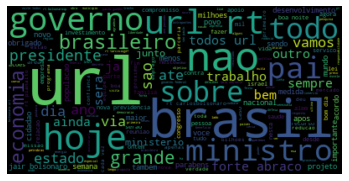

In [10]:
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()